In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections, lines, markers, path, patches
%matplotlib inline

In [2]:
from geometry import *

In [3]:
def gradient_descent(
                        pt_i, target, differential_fn, 
                        geometry="hyperbolic", learning_rate=1.,
                        return_vectors=False,
                        use_rel_direction=False
                    ):
    '''
        Calculate local gradient of differential, given the current pt and the target.
        Inputs:
                Two (d+1)-dimensional vectors in ambient space co-ordinates, pt_i and target
                pt_i: (d+1)-dimensional vector in ambient space co-ordinates,
                       the point to evaluate the gradient at.
                target: (d+1)-dimensional vectors in ambient space co-ordinates, the target point
                differential_fn: function that calculates the derivative
                learning_rate: dictates how far to step in gradient direction
                use_rel_direction: derivative direction is (v-u), rather than just u

    '''
    # Calculate gradient in ambient space co-ordinates
    step = differential_fn(pt_i, target, geometry, use_rel_direction)
    print("step =",step)
    # Project this gradient onto tangent space
    projection = project_to_tangent(pt_i, step, geometry)
    print("projection on tangent space = ",projection)
    # Map to manifold and return this updated pt
    if return_vectors:
        return (
                    exponential_map(-learning_rate*projection, pt_i, geometry),
                    step,
                    projection,
                )
    else:
        return exponential_map(-learning_rate*projection, pt_i, geometry)
#    return exponential_map(-projection, pt_i, geometry)

In [4]:
def error_differential_eucl(u, v, geometry="hyperbolic", use_rel_direction=False):
    '''
        Calculate differential of distance between points u and v, **with respect to u**,
        accounting for different geometries by implementing an appropriate metric.
        Inputs:
            u: (d+1)-dimensional vector, expressed in ambient space coordinates
            v: (d+1)-dimensional vector, expressed in ambient space coordinates
            geometry: specifies which metric to use (and hence how inner product calculated)
            use_rel_direction: derivative direction is (v-u), rather than just u 
        Outputs:
            gradient of the distance in (d+1)-dimensional ambient space coordinates
    '''   
    if np.array_equal(u,v):
        return np.zeros(u.shape)
    # If u and v are different, calculate the gradient
    metric = get_metric(u.shape[0], geometry)
    print("u = {}, v = {}, u.v = {}".format(u, v, dot(u, v, geometry)))
    if geometry == "spherical":
        coeff = -1./np.sqrt(1.-dot(u, v, geometry)**2)
    if geometry == "hyperbolic":        
        coeff = -1./np.sqrt(dot(u, v, geometry)**2-1.) 
    if use_rel_direction:
        return coeff*metric.dot(v-u)
    else:
        return coeff*metric.dot(v)
    #return coeff*v

In [5]:
target2 = np.array([1., 0.])
initial_pt2 = np.array([np.cos(0.49*np.pi), np.sin(0.49*np.pi)])
updated_pts = [initial_pt2]
steps = []
projections = []
for i in range(1,8):
    updated_pt, step, projection = gradient_descent(
                        updated_pts[i-1], 
                        target2, 
                        error_differential_eucl, 
                        geometry="spherical", 
                        learning_rate=.8,
                        return_vectors=True,
                    )
    updated_pts.append(updated_pt)
    steps.append(step)
    projections.append(projection)
    print("****theta =", np.arctan2(updated_pts[i][0], updated_pts[i][1]))
print(updated_pts)
updated_pts_norel = updated_pts

u = [0.03141076 0.99950656], v = [1. 0.], u.v = 0.031410759078128396
step = [-1.00049368 -0.        ]
project_to_tangent: point_on_manifold = [0.03141076 0.99950656], displacement = [-1.00049368 -0.        ], geometry = spherical
project_to_tangent: xp_norm = -0.03142626604335125, xx_norm = 1.0000000000000002
projection on tangent space =  [-0.99950656  0.03141076]
exponential_map: norm_v_tan =  0.7999999999999999
****theta = 0.8314159265358979
u = [0.73888621 0.67383023], v = [1. 0.], u.v = 0.7388862055678084
step = [-1.48405334 -0.        ]
project_to_tangent: point_on_manifold = [0.73888621 0.67383023], displacement = [-1.48405334 -0.        ], geometry = spherical
project_to_tangent: xp_norm = -1.0965465418934321, xx_norm = 1.0
projection on tangent space =  [-0.67383023  0.73888621]
exponential_map: norm_v_tan =  0.8
****theta = 1.6314159265358978
u = [ 0.99816319 -0.06058248], v = [1. 0.], u.v = 0.9981631946481939
step = [-16.50642239  -0.        ]
project_to_tangent: point_on_ma

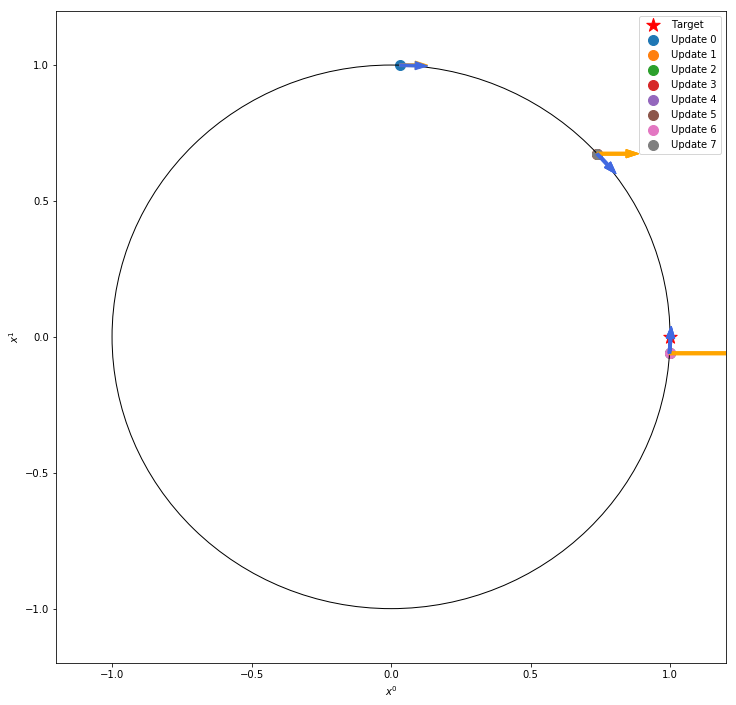

In [6]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_collection(collections.PatchCollection(patch_list))
ax.add_artist(circle)
ax.scatter(target2[0], target2[1], color='r', marker='*',s=200,label = "Target")
for i, pt in enumerate(updated_pts):
    ax.scatter(
                pt[0], pt[1], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=100, label="Update {}".format(i)
              )
    if i < len(updated_pts)-1:
        ax.arrow(pt[0], pt[1], -0.1*steps[i][0], -0.1*steps[i][1], 
                width=0.01, length_includes_head=True, label=r"ambient grad", color='orange')
        ax.arrow(pt[0], pt[1], -0.1*projections[i][0], -0.1*projections[i][1], 
                width=0.01, length_includes_head=True, label=r"ambient grad", color="royalblue")
ax.legend()
fig.savefig("diff_spheretest_baseline.pdf")

In [7]:
target2 = np.array([1., 0.])
initial_pt2 = np.array([np.cos(0.49*np.pi), np.sin(0.49*np.pi)])
updated_pts = [initial_pt2]
steps = []
projections = []
for i in range(1,8):
    updated_pt, step, projection = gradient_descent(
                        updated_pts[i-1], 
                        target2, 
                        error_differential_eucl, 
                        geometry="spherical", 
                        learning_rate=.8,
                        return_vectors=True,
                        use_rel_direction=True
                    )
    updated_pts.append(updated_pt)
    steps.append(step)
    projections.append(projection)
    print("****theta =", np.arctan2(updated_pts[i][0], updated_pts[i][1]))
print(updated_pts)
updated_pts_norel = updated_pts

u = [0.03141076 0.99950656], v = [1. 0.], u.v = 0.031410759078128396
step = [-0.96906742  1.        ]
project_to_tangent: point_on_manifold = [0.03141076 0.99950656], displacement = [-0.96906742  1.        ], geometry = spherical
project_to_tangent: xp_norm = 0.9690674171937931, xx_norm = 1.0000000000000002
projection on tangent space =  [-0.99950656  0.03141076]
exponential_map: norm_v_tan =  0.7999999999999999
****theta = 0.831415926535898
u = [0.73888621 0.67383023], v = [1. 0.], u.v = 0.7388862055678084
step = [-0.3875068  1.       ]
project_to_tangent: point_on_manifold = [0.73888621 0.67383023], displacement = [-0.3875068  1.       ], geometry = spherical
project_to_tangent: xp_norm = 0.3875067989735475, xx_norm = 0.9999999999999998
projection on tangent space =  [-0.67383023  0.73888621]
exponential_map: norm_v_tan =  0.7999999999999999
****theta = 1.6314159265358978
u = [ 0.99816319 -0.06058248], v = [1. 0.], u.v = 0.9981631946481937
step = [-0.03031908 -1.        ]
project_to_

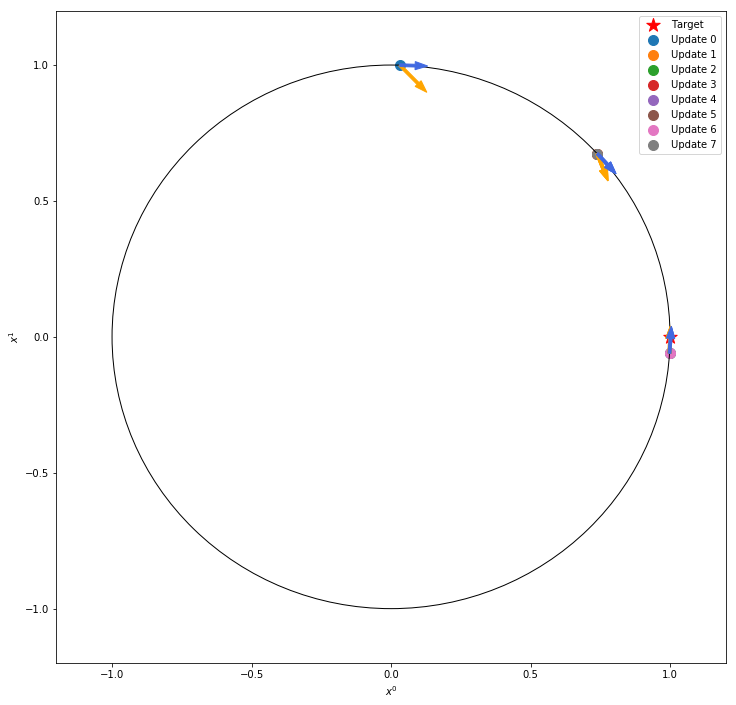

In [8]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_collection(collections.PatchCollection(patch_list))
ax.add_artist(circle)
ax.scatter(target2[0], target2[1], color='r', marker='*',s=200,label = "Target")
for i, pt in enumerate(updated_pts):
    ax.scatter(
                pt[0], pt[1], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=100, label="Update {}".format(i)
              )
    if i < len(updated_pts)-1:
        ax.arrow(pt[0], pt[1], -0.1*steps[i][0], -0.1*steps[i][1], 
                width=0.01, length_includes_head=True, label=r"ambient grad", color='orange')
        ax.arrow(pt[0], pt[1], -0.1*projections[i][0], -0.1*projections[i][1], 
                width=0.01, length_includes_head=True, label=r"ambient grad", color="royalblue")
ax.legend()
fig.savefig("diff_spheretest_reldir.pdf")

In [9]:
np.array_equal(updated_pts, updated_pts_norel)

True

So, it doesn't matter if I use the relative angle or not: post-mapping, the displacements are identical. What about with momentum?

In [10]:
def gradient_descent_with_mom(
                        pt_i, target, differential_fn, 
                        geometry="hyperbolic", 
                        learning_rate=1.,
                        momentum=None,
                        beta=0.9,
                        return_vectors=False,
                        test_rel_correction=False,
                    ):
    '''
        Calculate local gradient of differential, given the current pt and the target.
        Inputs:
                Two (d+1)-dimensional vectors in ambient space co-ordinates, pt_i and target
                pt_i: (d+1)-dimensional vector in ambient space co-ordinates,
                       the point to evaluate the gradient at.
                target: (d+1)-dimensional vectors in ambient space co-ordinates, the target point
                differential_fn: function that calculates the derivative
                learning_rate: dictates how far to step in gradient direction
                beta: coefficient dictating how to weight previous and current derivatives
    '''
    # Calculate gradient in ambient space co-ordinates
    diff = differential_fn(pt_i, target, geometry)
    if momentum is None:
        momentum = np.zeros(pt_i.shape)
        beta = 0.
    step = (1.-beta)*diff + beta*momentum
    
    print("step =",step)
    # Project this gradient onto tangent space
    projection = project_to_tangent(pt_i, step, geometry)
    print("projection on tangent space = ",projection)
    # Map to manifold and return this updated pt
    if return_vectors:
        return (
                    exponential_map(-learning_rate*projection, pt_i, geometry),
                    step,
                    projection,
                )
    else:
        return exponential_map(-learning_rate*projection, pt_i, geometry)
#    return exponential_map(-projection, pt_i, geometry)

In [11]:
target2 = np.array([1., 0.])
initial_pt2 = np.array([np.cos(0.49*np.pi), np.sin(0.49*np.pi)])
updated_pts = [initial_pt2]
steps = []
projections = []
step = None
for i in range(1,12):
    updated_pt, step, projection = gradient_descent_with_mom(
                        updated_pts[i-1], 
                        target2, 
                        error_differential_eucl, 
                        geometry="spherical", 
                        learning_rate=1.2,
                        beta=0.5,
                        momentum=step,
                        return_vectors=True,
                        test_rel_correction=True,
                    )
    updated_pts.append(updated_pt)
    steps.append(step)
    projections.append(projection)
    print("****theta =", np.arctan2(updated_pts[i][0], updated_pts[i][1]))
print(updated_pts)

u = [0.03141076 0.99950656], v = [1. 0.], u.v = 0.031410759078128396
step = [-1.00049368  0.        ]
project_to_tangent: point_on_manifold = [0.03141076 0.99950656], displacement = [-1.00049368  0.        ], geometry = spherical
project_to_tangent: xp_norm = -0.03142626604335125, xx_norm = 1.0000000000000002
projection on tangent space =  [-0.99950656  0.03141076]
exponential_map: norm_v_tan =  1.2
****theta = 1.231415926535898
u = [0.94296111 0.3329029 ], v = [1. 0.], u.v = 0.942961113067481
step = [-2.00218631  0.        ]
project_to_tangent: point_on_manifold = [0.94296111 0.3329029 ], displacement = [-2.00218631  0.        ], geometry = spherical
project_to_tangent: xp_norm = -1.8879838284118857, xx_norm = 0.9999999999999997
projection on tangent space =  [-0.22189097  0.62851529]
exponential_map: norm_v_tan =  0.7998403477189586
****theta = 2.0312562742548566
u = [ 0.89584821 -0.4443602 ], v = [1. 0.], u.v = 0.8958482099478741
step = [-2.12630645  0.        ]
project_to_tangent: 

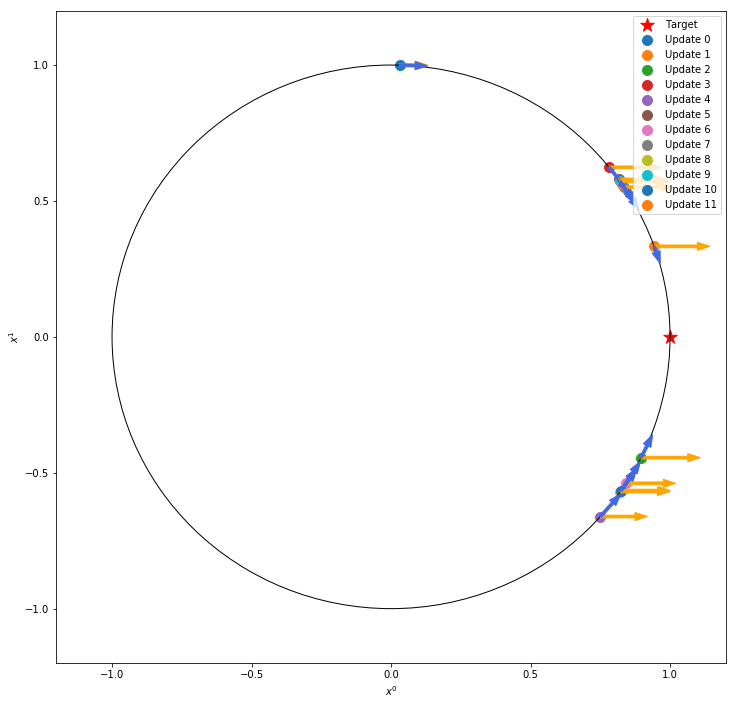

In [12]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_collection(collections.PatchCollection(patch_list))
ax.add_artist(circle)
ax.scatter(target2[0], target2[1], color='r', marker='*',s=200,label = "Target")
for i, pt in enumerate(updated_pts):
    ax.scatter(
                pt[0], pt[1], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=100, label="Update {}".format(i)
              )
    if i < len(updated_pts)-1:
        ax.arrow(pt[0], pt[1], -0.1*steps[i][0], -0.1*steps[i][1], 
                width=0.01, length_includes_head=True, label=r"ambient grad", color='orange')
        ax.arrow(pt[0], pt[1], -0.1*projections[i][0], -0.1*projections[i][1], 
                width=0.01, length_includes_head=True, label=r"ambient grad", color="royalblue")
ax.legend()
fig.savefig("diff_spheretest_reldir_mom.pdf")